In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Qiskit-SuperstaQ Pulse Manipulator Example

In [3]:
import qiskit_superstaq as qss
import qiskit
import os

In [4]:
if not qiskit.IBMQ.active_account():
    qiskit.IBMQ.enable_account(os.environ["IBMQ_TOKEN"])

In [5]:
provider = qiskit.IBMQ.get_provider(hub="ibm-q-startup", group="super-tech-labs", project="default")
lagos = provider.get_backend("ibm_lagos")

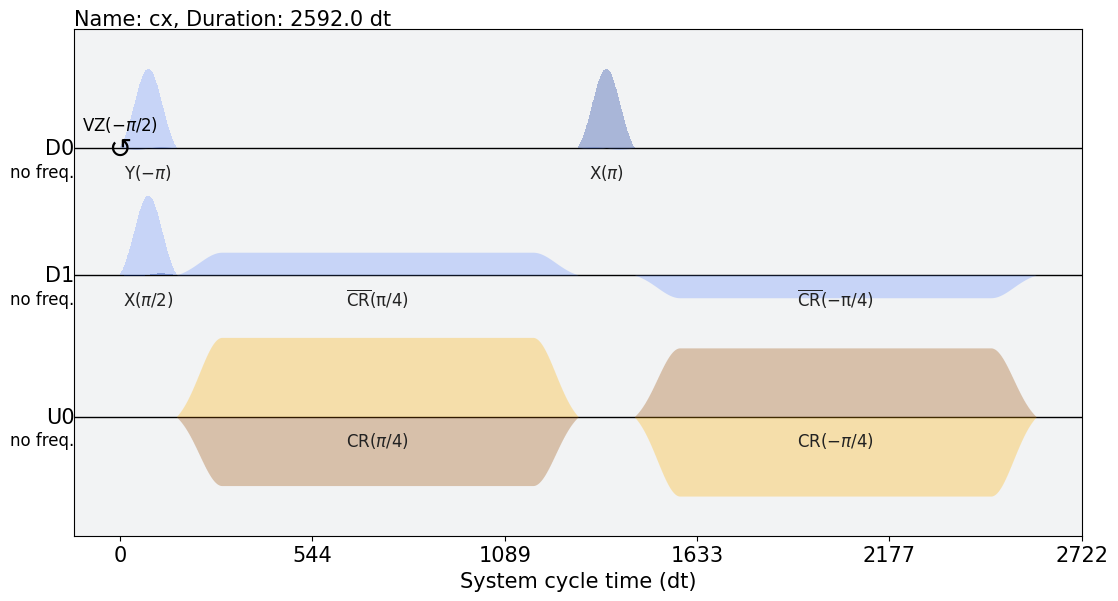

In [7]:
ism = lagos.defaults().instruction_schedule_map
cx_schedule = ism.get("cx", (0, 1))
cx_schedule.draw()

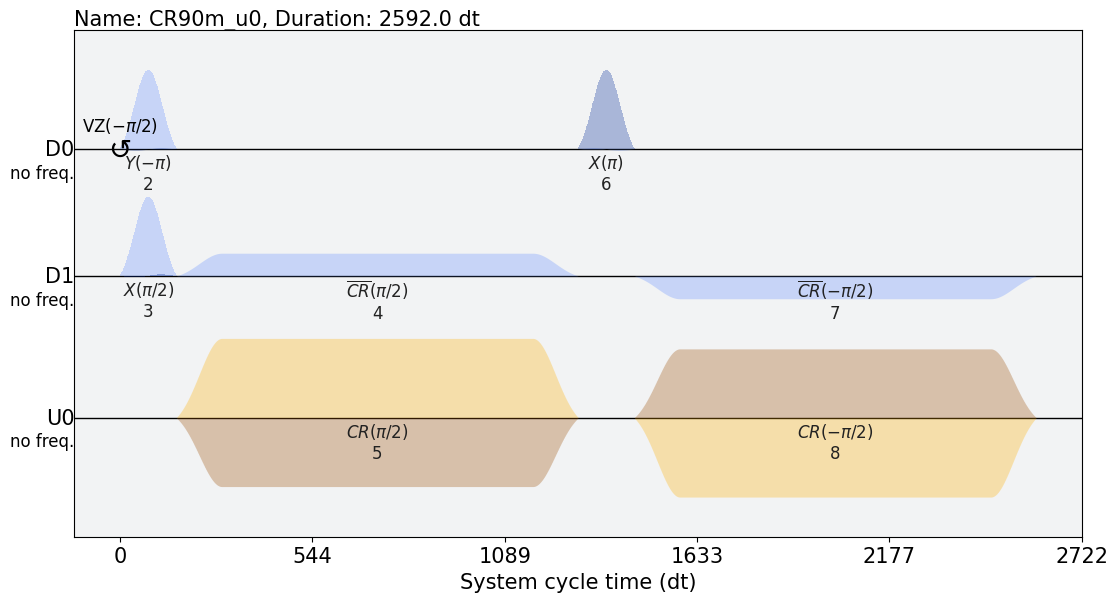

In [8]:
cx_pm = qss.PulseManipulator(cx_schedule, lagos)
cx_pm.draw()

In [13]:
cx_pm.get_duration(inst_id=3)

160

In [12]:
cx_pm.get_start_time(inst_id=4)

160

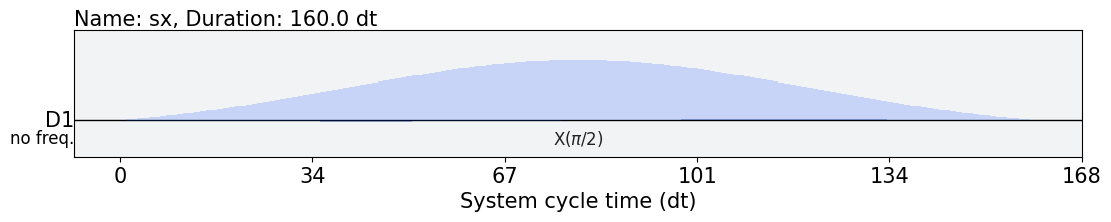

In [14]:
inst = ism.get("sx", 1)
inst.draw()

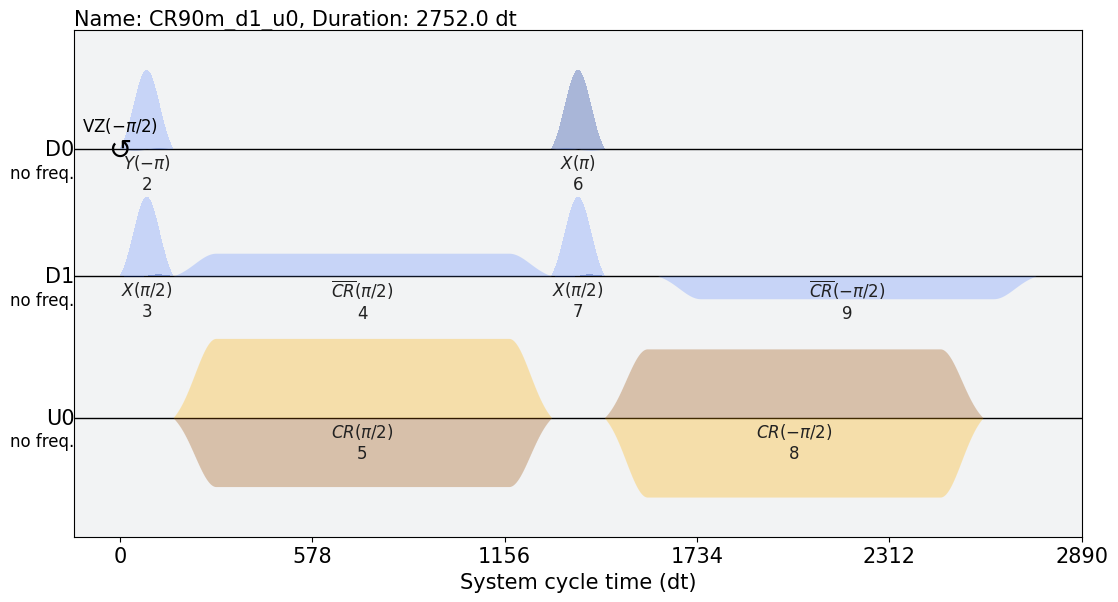

In [27]:
cx_pm.insert(cx_pm.get_stop_time(inst_id=4), inst, channel=qiskit.pulse.DriveChannel(1)).draw()

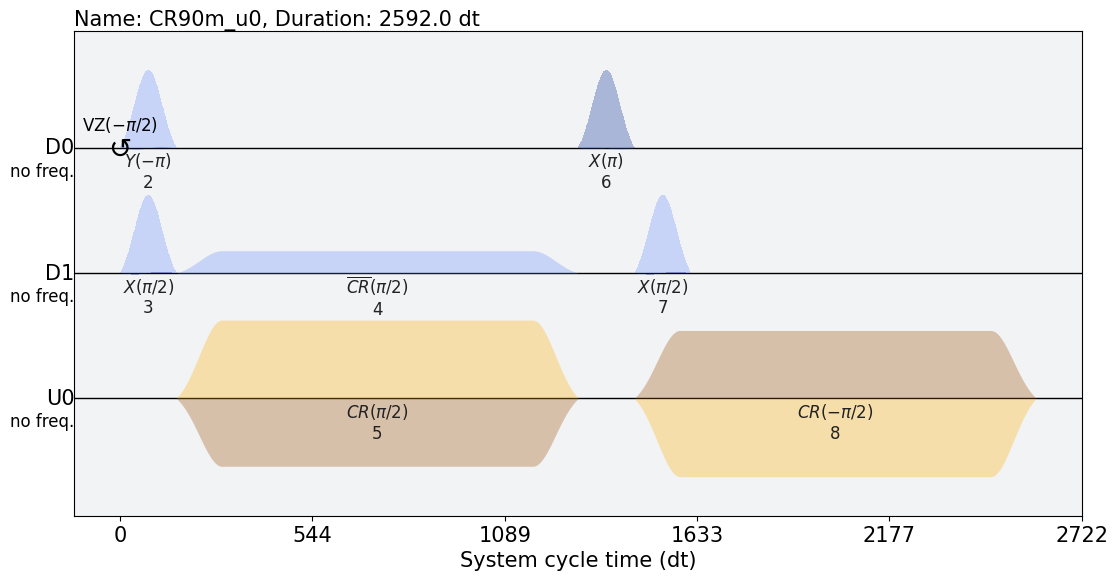

In [20]:
cx_pm.replace(inst_id=7, instruction=inst).draw()

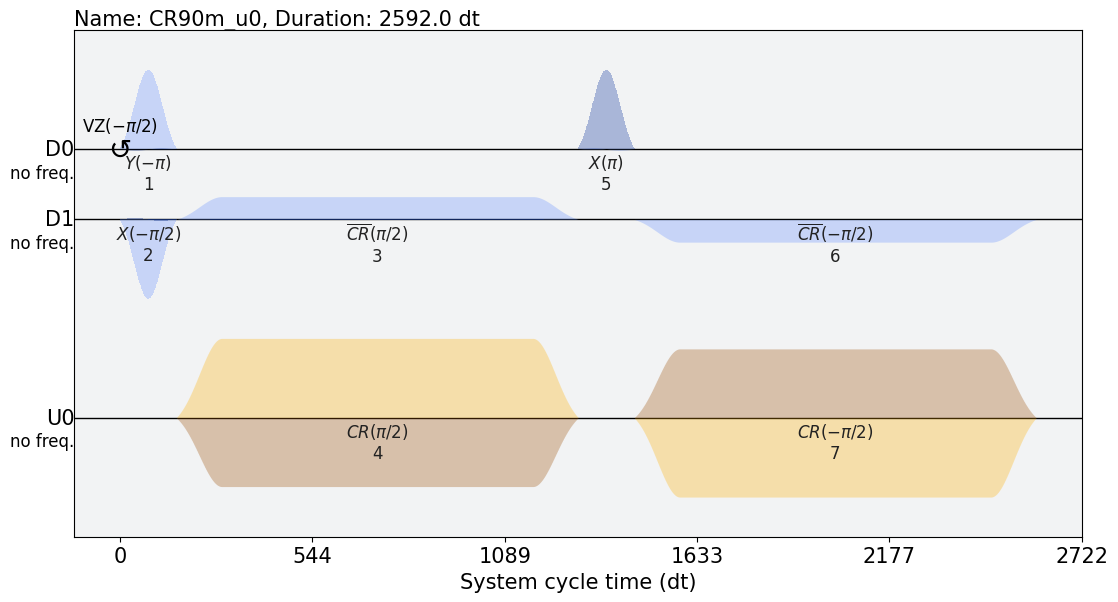

In [33]:
cx_pm.replace(inst_id=3, instruction=inst, negate=True).draw()

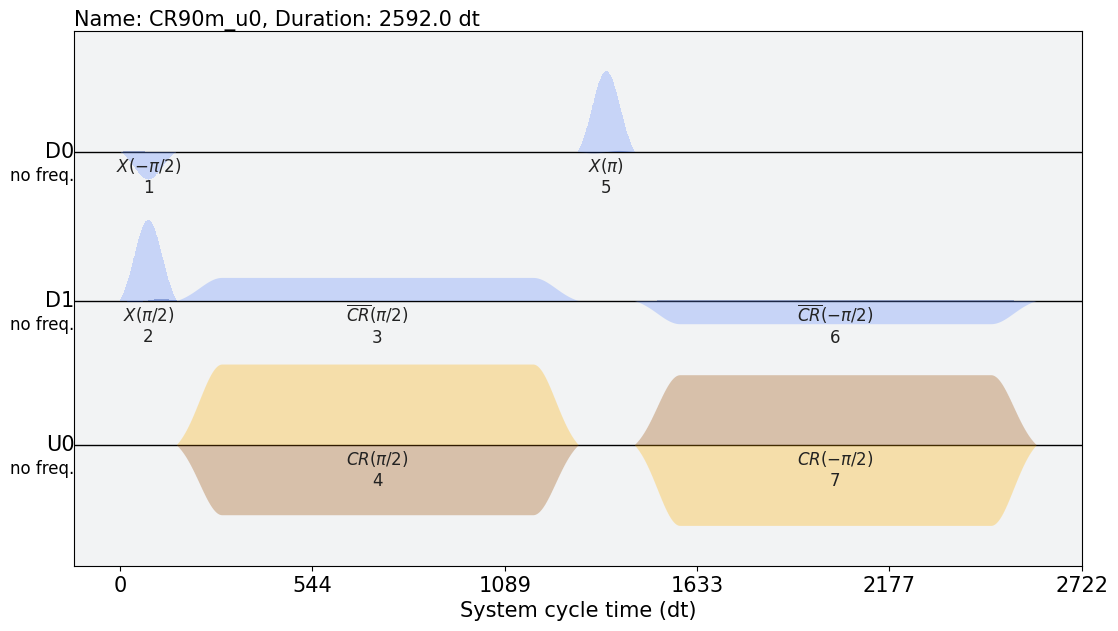

In [34]:
cx_pm.replace(inst_id=2, instruction=inst, negate=True).draw()

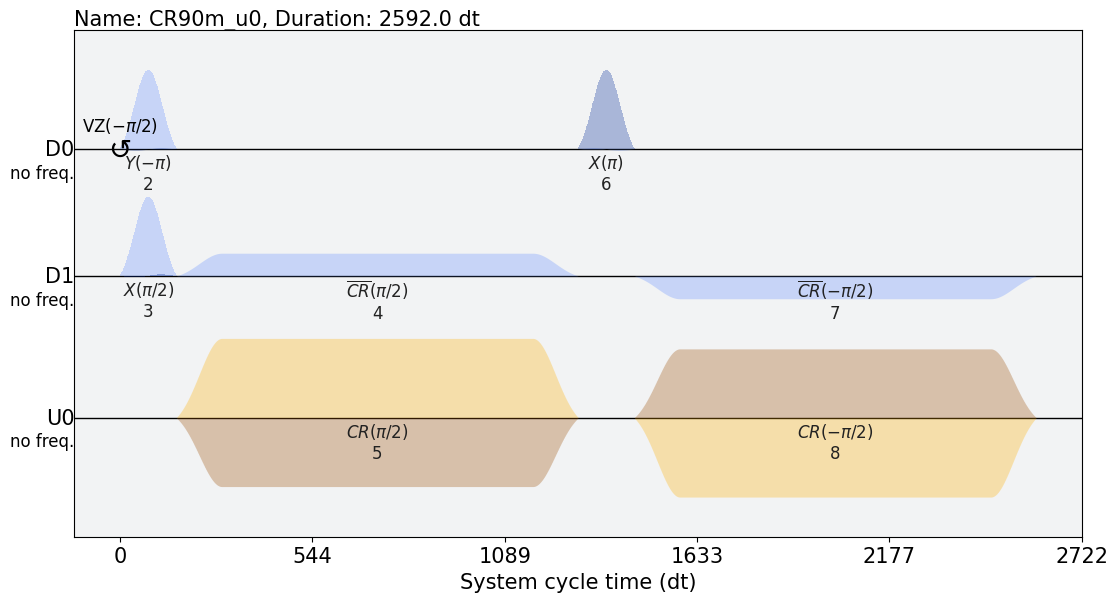

In [38]:
cx_pm.draw()

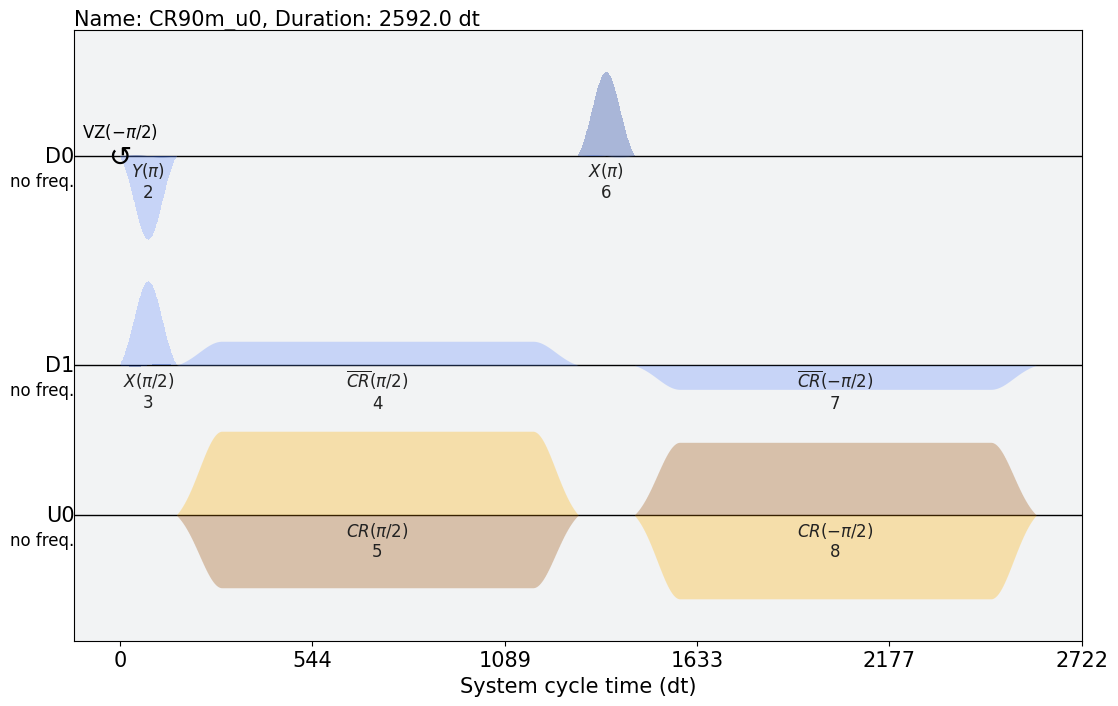

In [49]:
cx_pm.replace(inst_id=2, negate=True).draw()

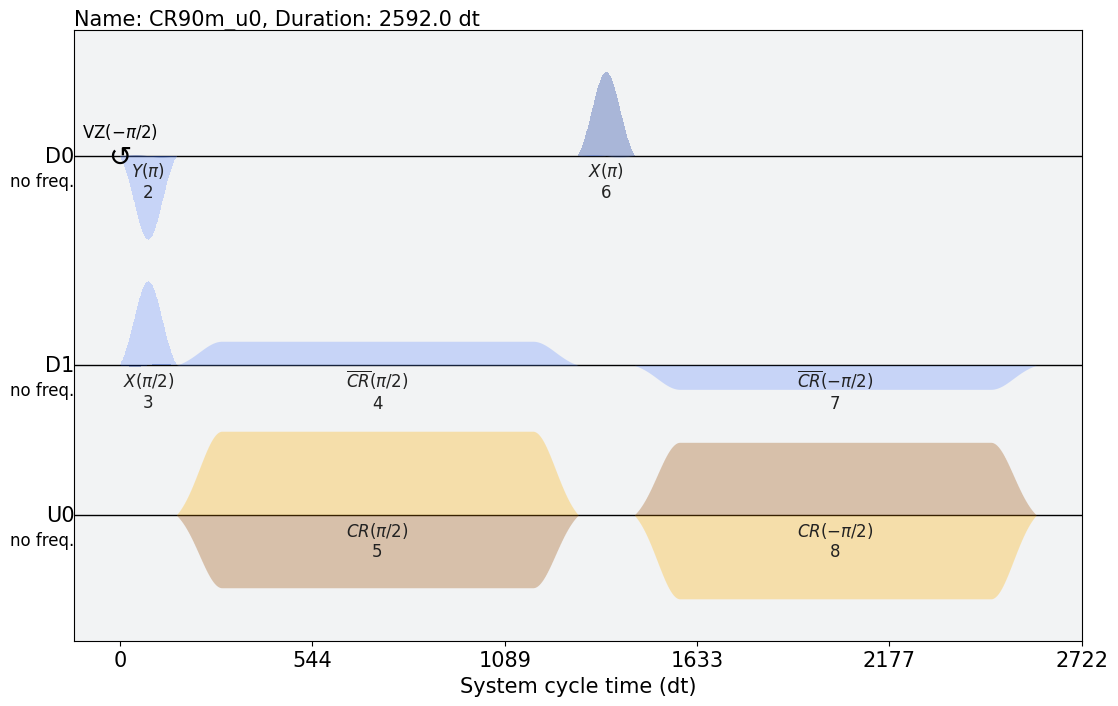

In [55]:
cx_pm.negate(inst_id=2).draw()

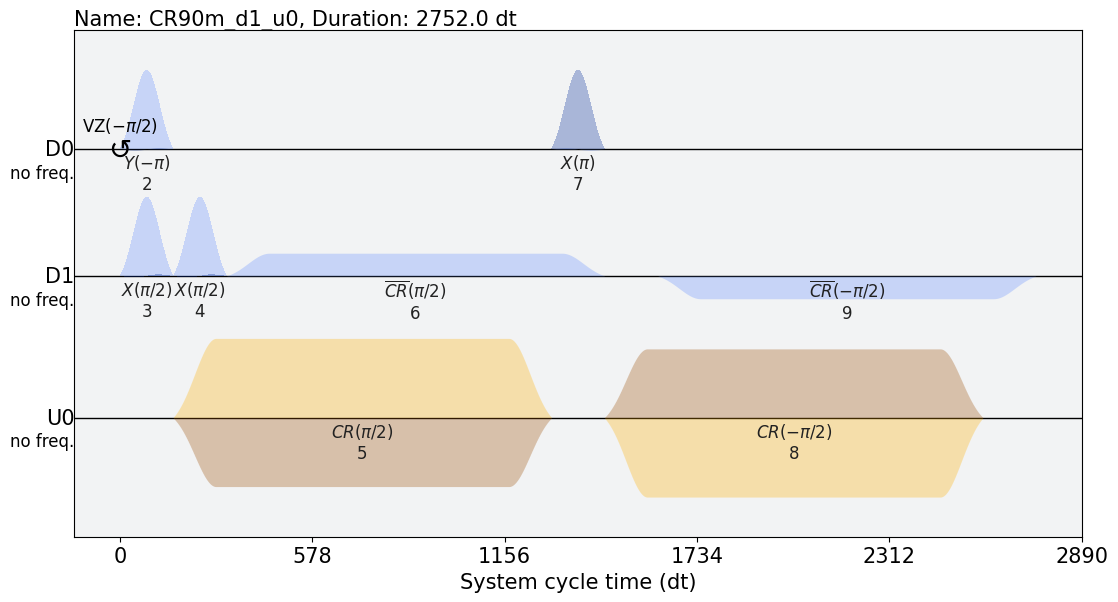

In [69]:
cx_pm.insert(
    cx_pm.get_stop_time(inst_id=3),
    inst
).draw()

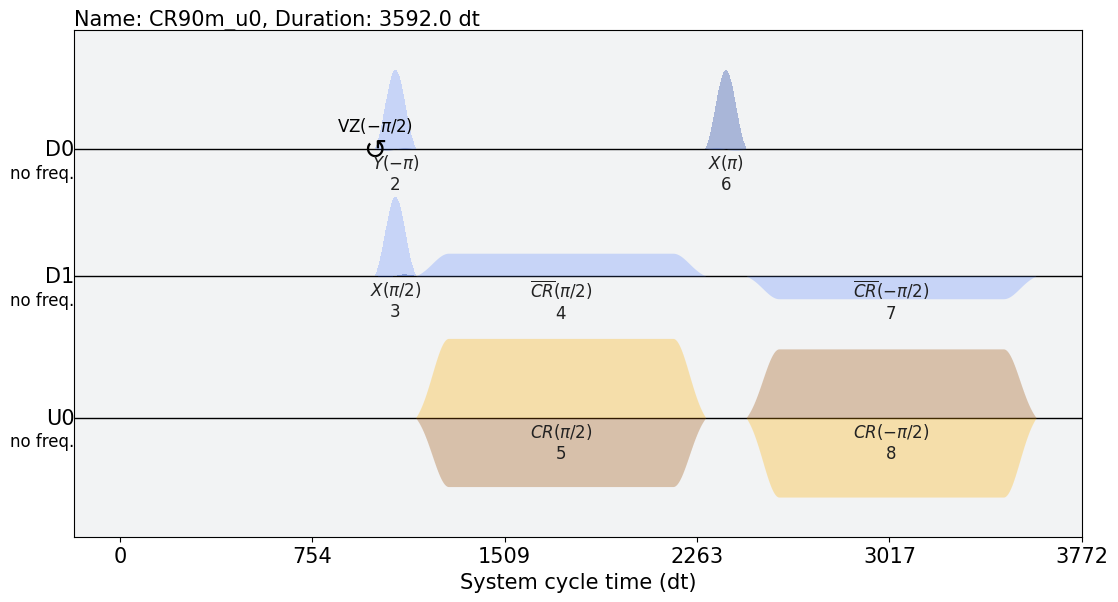

In [60]:
cx_pm.shift(1000).draw()

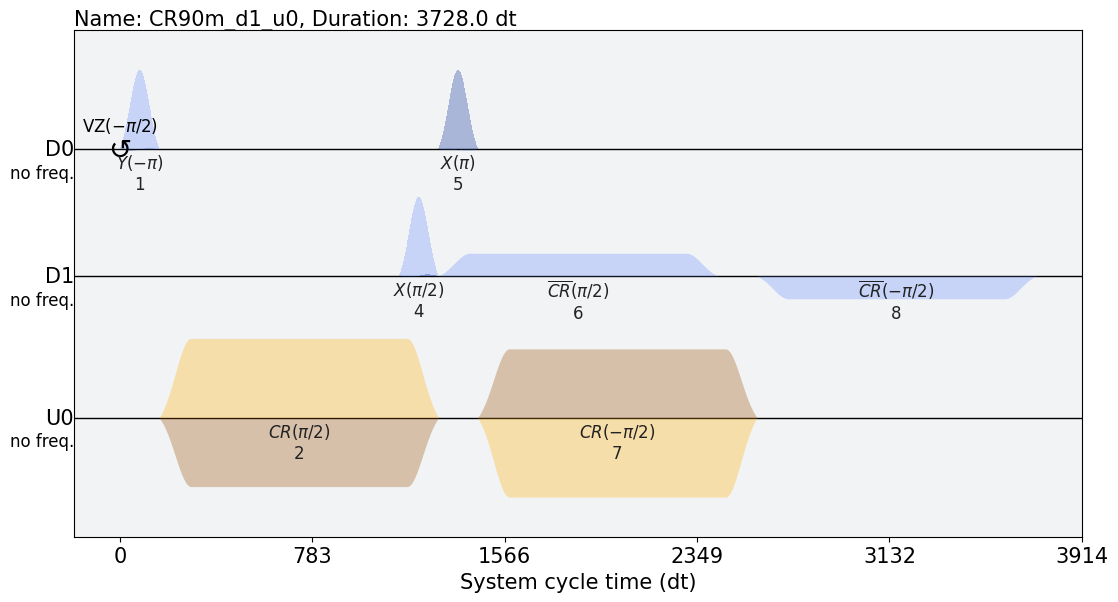

In [66]:
cx_pm.shift(
    shift_amount=cx_pm.get_duration(inst_id=4),
    channel=qiskit.pulse.DriveChannel(1)
).draw()

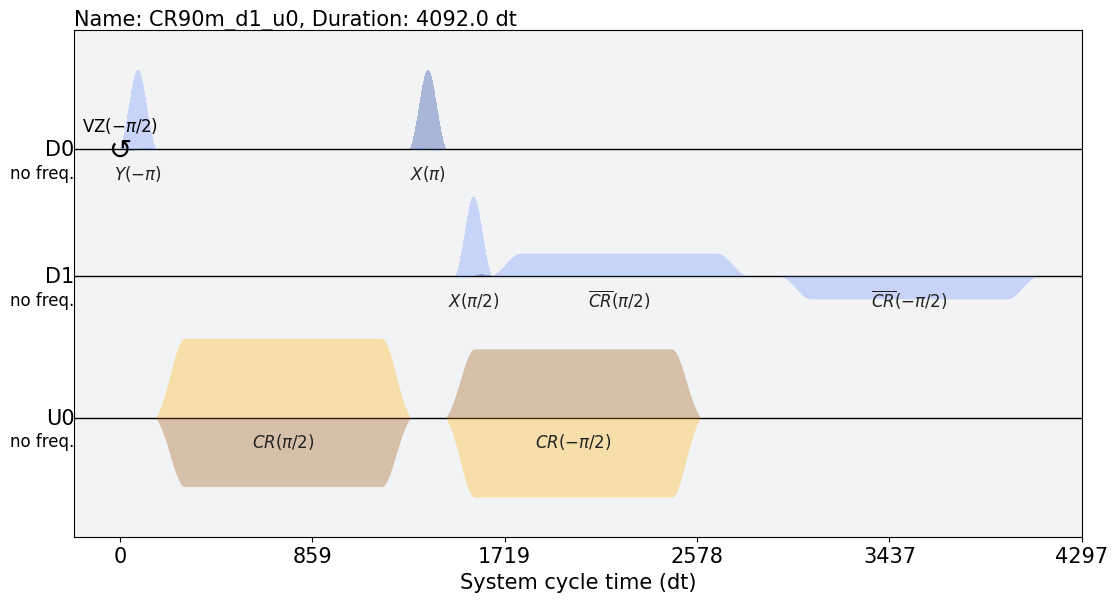

In [68]:
cx_pm.shift(1500, channel=qiskit.pulse.DriveChannel(1)).get_qiskit_schedule().draw()

A "logical" `ControlChannel` maps onto a physical `DriveChannel`. E.g.,

```
>>> backend.configuration().get_qubit_channels((0, 1))
[ControlChannel(0)]
```

E.g., the `CNOT` pulse schedule includes a virtual Z on `DriveChannel(0)`,

and if we inspect the instructions we see that a virtual Z is also applied